<a href="https://colab.research.google.com/github/siphemkngwn/The-2024-Pediatric-Sepsis-Challenge/blob/main/model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTETomek


from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Make sure this line is in your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from imblearn.combine import SMOTETomek









url='https://raw.githubusercontent.com/Kamaleswaran-Lab/The-2024-Pediatric-Sepsis-Challenge/refs/heads/main/SyntheticData_Training.csv'
df=pd.read_csv(url)


**Subsetting**

In [2]:
df=df.dropna(subset=['momagefirstpreg_adm'])

In [3]:
age_bins=[0,12,36,60,np.inf] # Use np.inf to represent infinity
age_labels=['infant','toddler','preschool','schoolgoing']
df['agecat']=pd.cut(df['agecalc_adm'],bins=age_bins,labels=age_labels)

#Selected variables from the list

In [4]:
sc=['height_cm_adm','muac_mm_adm','glucose_mmolpl_adm','lengthadm','rr_brpm_app_adm','weight_kg_adm','diasbp_mmhg_adm','sqi1_perc_oxi_adm','bcsverbal_adm','temp_c_adm','lactate_mmolpl_adm','hematocrit_gpdl_adm','bcsmotor_adm','sysbp_mmhg_adm','inhospital_mortality','agecat']

In [5]:
df=df[sc]

In [6]:
muac_bins=[0,115,125,np.inf]
muac_labels=['sam','mam','normal']
df['muac_cat']=pd.cut(df['muac_mm_adm'],bins=muac_bins,labels=muac_labels)

<ipython-input-6-1442154da344>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['muac_cat']=pd.cut(df['muac_mm_adm'],bins=muac_bins,labels=muac_labels)


In [7]:
LabelEncoder()
le=LabelEncoder()

In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'inhospital_mortality'] # Exclude target variable

In [9]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

<ipython-input-9-2725a2b89f9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-9-2725a2b89f9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-9-2725a2b89f9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [10]:
df['agecat']=le.fit_transform(df['agecat'])

<ipython-input-10-33128921ed90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agecat']=le.fit_transform(df['agecat'])


In [11]:
df.head()

,height_cm_adm,muac_mm_adm,glucose_mmolpl_adm,lengthadm,rr_brpm_app_adm,weight_kg_adm,diasbp_mmhg_adm,sqi1_perc_oxi_adm,bcsverbal_adm,temp_c_adm,lactate_mmolpl_adm,hematocrit_gpdl_adm,bcsmotor_adm,sysbp_mmhg_adm,inhospital_mortality,agecat,muac_cat
0,79.8,150.0,4.8,2,23.0,11.6,54.0,98.0,0,36.3,2.2,38.0,0,92.0,0,3,1
1,93.0,151.0,7.2,5,35.0,13.6,42.0,99.0,0,36.8,2.7,42.0,0,72.0,0,1,1
2,68.2,148.0,5.0,4,56.0,8.2,51.0,98.0,0,37.2,2.9,40.0,0,94.0,0,0,1
3,95.0,138.0,11.7,5,38.0,12.0,57.0,99.0,0,37.6,NaN,NaN,0,94.0,0,1,1
4,83.0,165.0,5.8,7,61.0,12.0,73.0,96.0,0,38.7,4.4,42.0,0,107.0,0,3,1


In [12]:
numerical_features = df.select_dtypes(include=['number']).columns

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imputer = SimpleImputer(strategy='median')

In [15]:
df['agecat'] = le.fit_transform(df['agecat'])

df['bcsmotor_adm']=le.fit_transform(df['bcsmotor_adm'])
df['hematocrit_gpdl_adm']=le.fit_transform(df['hematocrit_gpdl_adm'])
df['bcsverbal_adm']=le.fit_transform(df['bcsverbal_adm'])

In [16]:
x=df.drop('inhospital_mortality',axis=1)
y=df['inhospital_mortality']

In [17]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
x = imputer.fit_transform(x)

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [19]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

#scaling

In [20]:
_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [22]:
rf_classifier.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [23]:
y_pred=rf_classifier.predict(x_test)

In [24]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9979716024340771


In [25]:
sensitivity = recall_score(y_test, y_pred)
print(f"Sensitivity (Recall): {sensitivity}")

Sensitivity (Recall): 0.9523809523809523


In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

specificity = tn / (tn + fp)

print(f"Specificity: {specificity}")

Specificity: 1.0


In [27]:
y_pred_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Get probabilities for the positive class

# Now, calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

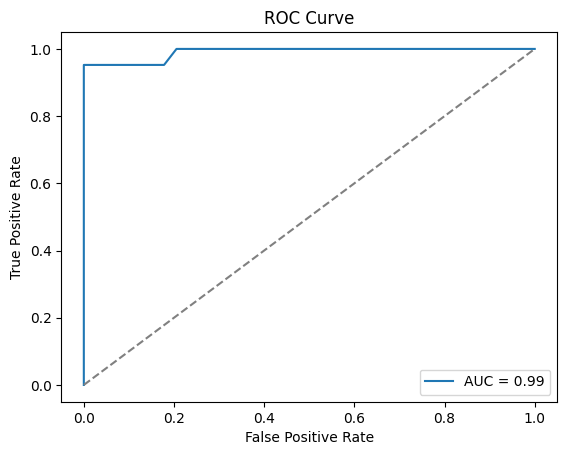

In [28]:
y_pred_proba = rf_classifier.predict_proba(x_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') # Diagonal line for random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()